In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


<h1><center>Lost at space?
    </center></h1>


<p align="center">
  <img width="2000" height="1000" src="https://cdn.pixabay.com/photo/2017/08/30/01/05/milky-way-2695569__480.jpg">
</p>


## 1. Feature Observation (Visualization)
* Dividing the columns according to their data types 
* Using Seaborn for visualization

## 2. Feature Engineering
* Extracting the Cabin column
* Perform one hot encoding for necessary features
* Getting features ready for our model (train + validation split)

## 3. Training + Validation
* Random Forest Model Implementation
* XGBoost Model Implementation
* Hyperparameter Tuning through Random Search

## 4. Machine Learning Model Report (Random Forest)
* Confusion Matrix
* Feature Importances

## 5. Summary
* Making our submission file
* Possible areas of improvement
* acknowledgements

## 6. PyTorch

In [2]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv')
sample_df = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

# 1. Feature Observation

In [3]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### Let us first divide the features into 'objects', 'boolean', 'float' datatypes

In [4]:
objects = train_df.select_dtypes(include='object')
boolean = train_df.select_dtypes(include='bool')
numbers = train_df.select_dtypes(include='float')

## 1.1 Numerical Feature Observation

Text(0.5, 0.98, 'Distribution of Numerical Features')

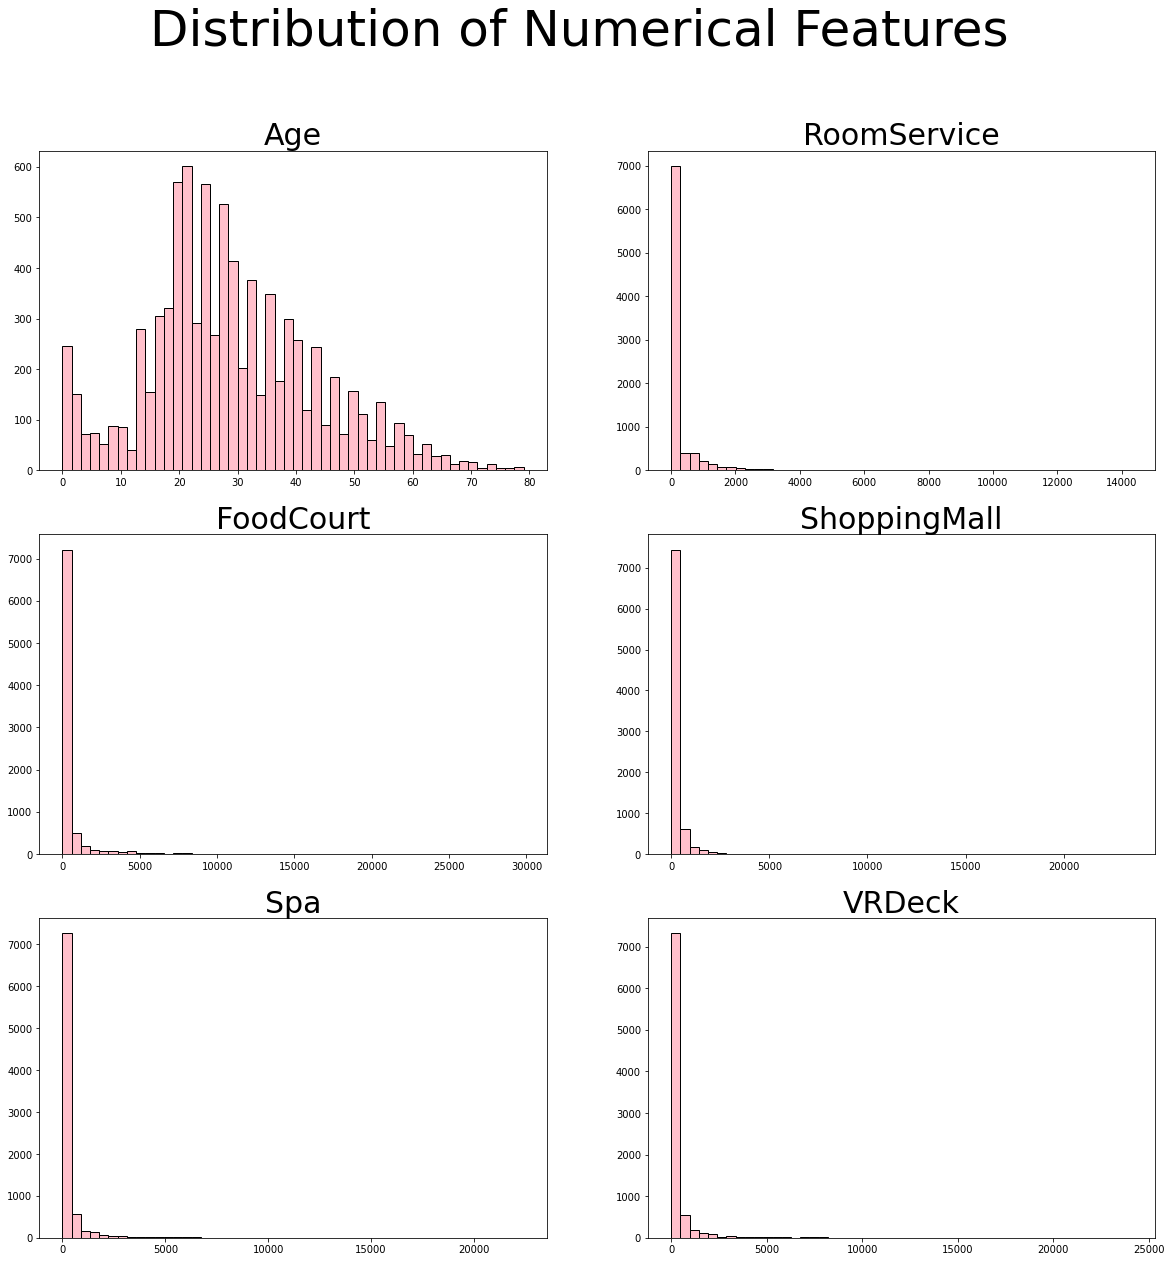

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
    
# Draw the plot
for count, feature in enumerate(numbers.columns.tolist()):
    ax = plt.subplot(3, 2, count+1)    
    ax.set_title("{}".format(feature), size = 30)
    ax.hist(numbers[feature],color = 'pink', edgecolor = 'black', bins = 50)
    
plt.suptitle("Distribution of Numerical Features", fontsize = 50)

> #### Seems like majority of the people onboard did not spend much at each of the Spaceship Titanic's many luxury amenities. 
> #### For the age wise, it seems like majority of our passengers were between the ages of 20 to 30 while there was a pretty large number of infants onboard too

## 1.2 Object Feature Observation

In [6]:
objects

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [7]:
for i in objects.columns.tolist()[1:-1]:
    print(objects[i].describe(),"\n")

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object 

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object 

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object 

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object 

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object 



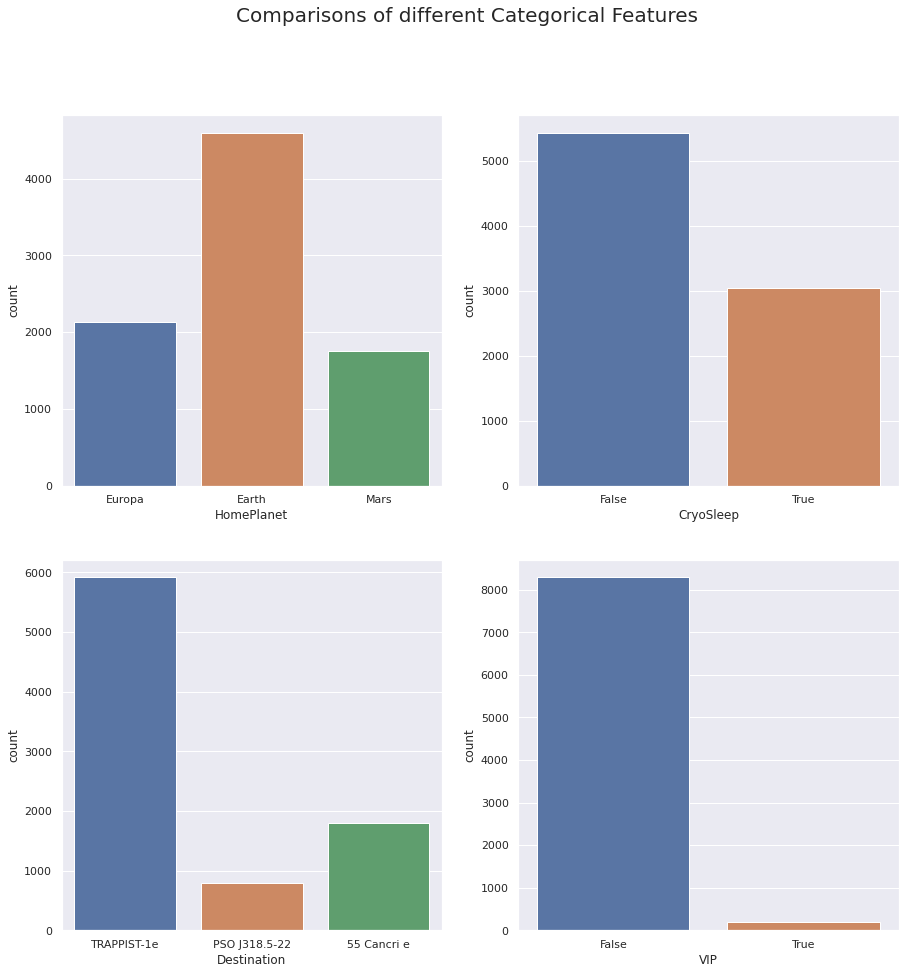

In [8]:
sns.set_theme(style="darkgrid")
fig, ax =plt.subplots(2, 2,figsize=(15, 15))
sns.countplot(x = 'HomePlanet', data = objects, ax=ax[0][0])
sns.countplot(x = 'CryoSleep', data=objects, ax=ax[0][1])
sns.countplot(x = 'Destination', data = objects, ax=ax[1][0])
sns.countplot(x = 'VIP', data = objects, ax=ax[1][1])
fig.suptitle('Comparisons of different Categorical Features', fontsize=20)
fig.show()

> #### Seems like most of the people on board were from Earth and a vast majority of them were headed for the TRAPPIST-1e. 
> #### It can also be seen that almost all of them were not VIP and about 5500 of them did not opt for cryosleep for the journey
> #### For Cabin, we will leave that to the feature engineering section to accomplish and we wound visualize the outcomes then

# 2. Feature Engineering

#### I will first engineer the **Cabin** column which seems pretty important
#### The column contains these following information
* deck
* num
* side

#### If we can extract out those informations to three different columns, our model would be able to extract weights from those individual columns for a possibly more accurate prediction

In [9]:
objects['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [10]:
objects['Cabin'].fillna(0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
import math
deck = []
num = []
side = []

for i in range(len(objects['Cabin'])):
    if objects['Cabin'].iloc[i] == 0:
        result = [math.nan, math.nan, math.nan]
    else:
        result = objects['Cabin'].iloc[i].split('/')
    deck.append(result[0])
    num.append(result[1])
    side.append(result[2])
    
objects['Deck'] = deck
objects['Num'] = num
objects['Side'] = side

objects

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,E,608,S


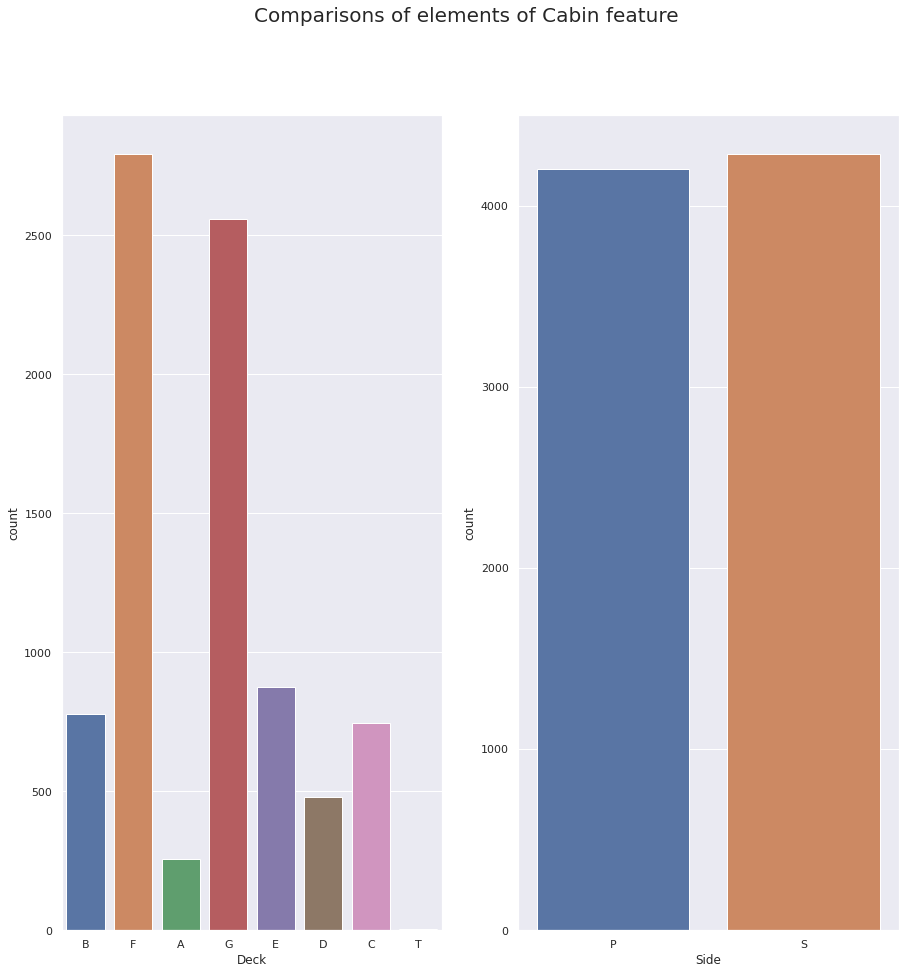

In [12]:
sns.set_theme(style="darkgrid")
fig, ax =plt.subplots(1,2,figsize=(15, 15))
sns.countplot(x = 'Deck', data = objects, ax=ax[0])
sns.countplot(x = 'Side', data=objects, ax=ax[1])

fig.suptitle('Comparisons of elements of Cabin feature', fontsize=20)
fig.show()

In [13]:
#Changing datatype of 'Num' into float for visualization as shown below
objects = objects.astype({"Num": float})

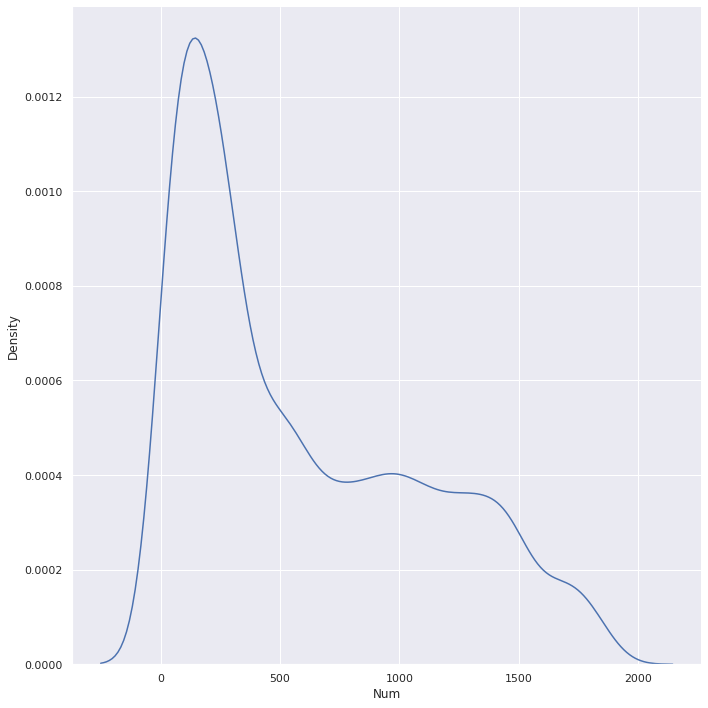

In [14]:
sns.displot(objects, x="Num",kind="kde", height=10)

> #### It seems like for the Decks, majority of the people were in F and G while the number on the portside was similar to the ones on the starboard side. 
> #### For the Num column, seems like the majority is around 100 to 200. This Cabin number at first might seem like it doesn't pose much information but since we do not know the layout of the spaceship, leaving the learning to the model might help the model predict the room number in which the occupants had a higher rate of survival possibility, probably due to the distance to the exit

#### Now let us ensure our feature columns are in one single dataframe and split them into 70% training data and 30% validation data

## 2.1 Data Preparation

In [15]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv')

train_df['label'] = 'train'
test_df['label'] = 'test'

# Concat
concat_df = pd.concat([train_df , test_df])

In [16]:
#Extracting out the 'Cabin' column
concat_df['Cabin'].fillna(0, inplace=True)

deck = []
num = []
side = []

for i in range(len(concat_df['Cabin'])):
    if concat_df['Cabin'].iloc[i] == 0:
        result = [math.nan, math.nan, math.nan]
    else:
        result = concat_df['Cabin'].iloc[i].split('/')
    deck.append(result[0])
    num.append(result[1])
    side.append(result[2])
    
concat_df['Deck'] = deck
concat_df['Num'] = num
concat_df['Side'] = side

In [17]:
concat_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

> #### Let's proceed on with one-hot encoding for our categorical features

In [18]:
onehotencoding = pd.get_dummies(concat_df.select_dtypes(include='object').drop(['Transported', 'label'], axis=1))
concat_df.drop(concat_df.select_dtypes(include='object').drop(['Transported', 'label'], axis=1), axis=1, inplace=True)
concat_set = pd.concat([concat_df, onehotencoding], axis=1)

# Split your data
train_df = concat_set[concat_set['label'] == 'train']
test_df = concat_set[concat_set['label'] == 'test']

# Drop your labels
train_df = train_df.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)

> #### One hot encoding is done
> #### We won't carry out any feature scaling and normalization as we would be using Random Forest model for this classification problem
> #### However, we would need to fill in the missing (NaN) values for numerical columns for this model to work

In [19]:
train_df.isna().sum().head(10)

Age                  179
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

#### For 'Age', we would use MissForest Imputation.

#### For the rest of the missing numerical columns, I will just impute it with the mode value as the data is very skewed towards the low values. 

In [20]:
pip install missingpy

     |████████████████████████████████| 49 kB 203 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [21]:
from missingpy import MissForest

# Impute
imputer = MissForest()
data_imputed = imputer.fit_transform(train_df.iloc[: , :6])
data_imputed = pd.DataFrame(data=data_imputed, columns=train_df.iloc[: , :6].columns)

data_imputed

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Iteration: 0
Iteration: 1
Iteration: 2


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [22]:
train_df.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace=True)
train_df = pd.concat([train_df, data_imputed], axis=1)
train_df.isna().sum()

Transported          0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
CryoSleep_False      0
                    ..
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Length: 1921, dtype: int64

In [23]:
train_df.Transported = train_df.Transported.astype(bool)

#### All the work is done for imputation 

In [24]:
from sklearn.model_selection import train_test_split
y = train_df['Transported']
X = train_df.drop('Transported', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# 3. Training + Validation

![](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

##### Image taken from https://www.youtube.com/watch?v=goPiwckWE9M

#### For this dataset, I would be using **Random Forest Classifier**. 
#### For those of you not familiar with this model, it is basically a ensemble method where there are numerous numbers of decision trees and averaging is used to improve the predictive accuracy and control over-fitting. 
#### This model heavily relies on the "Wisdom of Crowds"
#### As we know, decision trees can prove to be extremely accurate and does not need its features to be scaled nor normalized 
#### Furthermore, overfitting will be controlled later in the hyperparameter tuning section via hyperparameters such as n_estimators and max_depth
#### For more information, please visit this website https://towardsdatascience.com/understanding-random-forest-58381e0602d2 which I think does a terrific job of explaining this model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_jobs=-1, random_state=42)

#Fitting the model
model.fit(X_train,y_train)

#Prediction
pred = model.predict(X_val)

#Evaluation
accuracy = accuracy_score(y_val, pred)
auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

#Statement
print("The accuracy is {} and roc_auc_score is {}".format(accuracy, auc))

The accuracy is 0.7891104294478528 and roc_auc_score is 0.865280136172936


#### Our model engineering won't be complete without some Hyperparameter Tuning which I will be performing using GridSearch with Cross Validation

In [26]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [70,90, 110, 130],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100, 150, 200, 250, 300]
}
# Create a based model
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min


[CV] max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   7.1s
[CV] max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  12.8s
[CV] max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=250 
[CV]  max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=  15.5s
[CV] max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  max_depth=70, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  18.3s
[CV] max_depth=70, min_samples_leaf=1, min_samples_split=4, n_estimators=150 
[CV]  max_depth=70, min_samples_leaf=1, min_samples_split=4, n_estimators=150, total=   8.8s
[CV] max_depth=70, min_samples_leaf=1, min_samples_split=4, n_estimators=250 
[CV]  max_depth=70, min_samples_leaf=1, min_samples_split=4, n_esti

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.9min



[CV] max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=250 
[CV]  max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=250, total=   4.7s
[CV] max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   5.3s
[CV] max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=150 
[CV]  max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=150, total=   3.4s
[CV] max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   3.6s
[CV] max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=250 
[CV]  max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=250, total=   4.9s
[CV] max_depth=90, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=90, min_samples_leaf=2, min_samples_split=6, n_est

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 14.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [70, 90, 110, 130],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=2)

#### So we successfully obtained our best performing parameters

In [27]:
grid_search.best_params_

{'max_depth': 110,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 250}

## Let us check the validation metrics with our improved model after some personal tuning too

In [28]:
rf_model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators = 230, 
                               min_samples_split = 5, 
                               min_samples_leaf = 1,  
                               max_depth = 110, 
                               bootstrap = True)

#Fitting the model
rf_model.fit(X_train,y_train)

#Prediction
pred = rf_model.predict(X_val)

#Evaluation
improved_accuracy = accuracy_score(y_val, pred)
improved_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

improvement_in_accuracy = ((improved_accuracy-accuracy)/accuracy)*100
imporvement_in_auc = ((improved_auc-auc)/auc)*100

#Statement
print("After Hyperparameter Tuning, the accuracy is {} and roc_auc_score is {}".format(improved_accuracy, improved_auc))
print("Improvement in accuracy is {:.2f}% and in roc_auc_score is {:.2f}%".format(improvement_in_accuracy,imporvement_in_auc))

After Hyperparameter Tuning, the accuracy is 0.7933282208588958 and roc_auc_score is 0.865280136172936
Improvement in accuracy is 0.53% and in roc_auc_score is 0.00%


#### The tuned model has seen an improvement but not by a significant extent

#### For the second model, I will be using XGBoost. XGBoost is also an ensemble method but this algorithm is focused on limiting the error/loss that it's predictions bring

In [29]:
from xgboost import XGBClassifier

boost_model = XGBClassifier(n_jobs=-1, random_state=42)

#Fitting the model
boost_model.fit(X_train,y_train)

#Prediction
pred = boost_model.predict(X_val)

#Evaluation
accuracy = accuracy_score(y_val, pred)
auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

#Statement
print("The accuracy is {} and roc_auc_score is {}".format(accuracy, auc))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy is 0.790260736196319 and roc_auc_score is 0.865280136172936


#### It seems like our baseline Gradient Boosting model is not as accurate as our Random Forest Model. Let us try with some hyperparameters

In [30]:
boost_model = XGBClassifier(n_jobs=-1, random_state=42, max_depth = 5)

#Fitting the model
boost_model.fit(X_train,y_train)

#Prediction
pred = boost_model.predict(X_val)

#Evaluation
improved_accuracy = accuracy_score(y_val, pred)
improved_auc = roc_auc_score(y_val, boost_model.predict_proba(X_val)[:, 1])

improvement_in_accuracy = ((improved_accuracy-accuracy)/accuracy)*100
imporvement_in_auc = ((improved_auc-auc)/auc)*100

#Statement
print("After Hyperparameter Tuning, the accuracy is {} and roc_auc_score is {}".format(improved_accuracy, improved_auc))
print("Improvement in accuracy is {:.2f}% and in roc_auc_score is {:.2f}%".format(improvement_in_accuracy,imporvement_in_auc))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
After Hyperparameter Tuning, the accuracy is 0.7925613496932515 and roc_auc_score is 0.8804572545084641
Improvement in accuracy is 0.29% and in roc_auc_score is 1.75%


#### Seems like our tuned Gradient Boosting Model has a very slight advantage over our Random Forest Model

# 4. Machine Learning Model Report (Random Forest)

#### Let us first look at our confusion matrix for an overview of our Random Forest model's performance

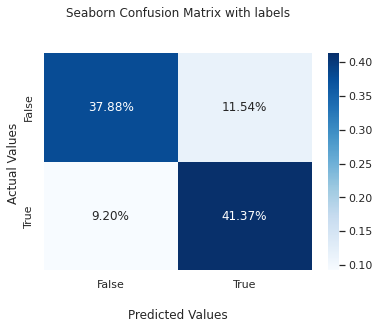

In [31]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, pred)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

sns.set(rc={'figure.figsize':(10,10)})
## Display the visualization of the Confusion Matrix.
plt.show()

#### Seems like 80% of our predictions lies in the True Positive and True Negative portion which seems like a decent number
#### The False Positive and False Negative proportions are also balanced

#### Now let us look at the feature importances which may give us a good insight as to which features were important and which were not as much

<AxesSubplot:>

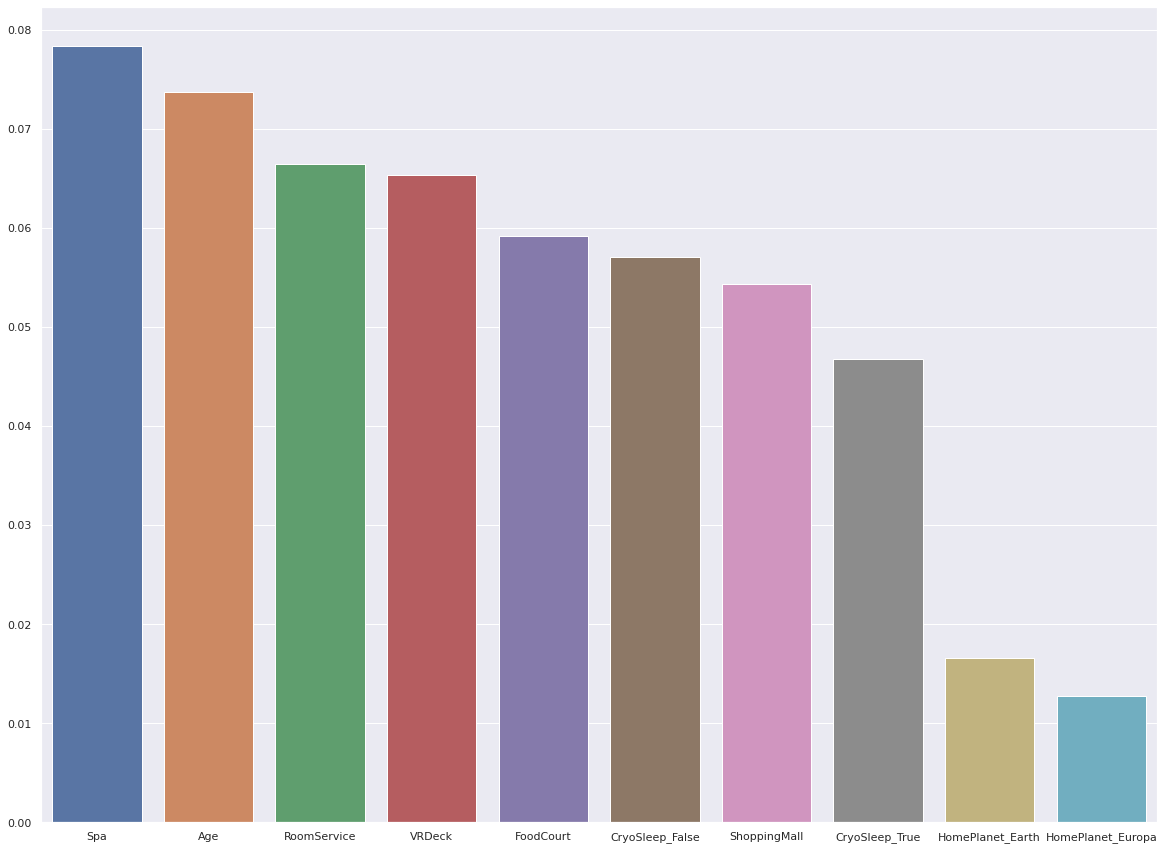

In [32]:
feats = {} 
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance
    
feature_importances = sorted(feats.items(), key=lambda x: x[1], reverse=True)

df = {"Feature": [], "Importance": []}
for i in feature_importances[:10]:
    df["Feature"].append(i[0])
    df['Importance'].append(i[1])
    
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x='Feature', y='Importance', data = df)

#### The numerical columns seems to have had the highest importances. However, I have my doubts as I do not believe the amount spent at these amenities would greatly influence whether the person was transported. This may be due to several reasons. 
#### 1. The data for these numerical columns are very skewed to the lower values and most of the data points are 0
#### 2. Since values for these categories are very low, even a small change in these values might greatly influence our model's predictions (without much meaning), thus explaining the high feature importance placed by our model
#### The following features with the highest importances are whether the person opted for CryoSleep and their planet of Origin. 

# 5. Summary

#### Let us create a file to submit to the leaderboard

In [33]:
# Impute
imputer = MissForest()
data_imputed = imputer.fit_transform(test_df.iloc[: , :6])
data_imputed = pd.DataFrame(data=data_imputed, columns=test_df.iloc[: , :6].columns)
test_df.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace=True)
test_df = pd.concat([test_df, data_imputed], axis=1)

test_df.drop('Transported', axis=1, inplace=True)

#submission
rf_submission = rf_model.predict(test_df)
boost_submission = boost_model.predict(test_df)

#submission file
sample_df['Transported'] = rf_submission
sample_df.to_csv('rf_submission.csv', index=False)

sample_df['Transported'] = boost_submission
sample_df.to_csv('boost_submission.csv', index=False)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [34]:
sample_df['Transported'] = boost_submission
sample_df.to_csv('submission.csv', index=False)

#### Our model seems to have performed decently with a rough accuracy of 79~80%. 
#### However, I do believe attempting other models to our data and selecting which feature to feed into our models might bring a higher accuracy. 
#### In the near future, I am planning on fitting **Gradient Boosting Model** (completed above) to our data and as to the feature engineering wise, I plan to try out different data imputation methods such as **KNNImputer**. Even different methods of hyperparameter tuning might help out, possibly using **Bayesian Optimization** which I am very interested in
#### So do check out my profile for more informative notebooks like this! 
#### Any suggestions and comments are very much welcomed! Thank you for reading :)

## Acknowledgements
### https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
### https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
### https://towardsdatascience.com/imputing-numerical-data-top-5-techniques-every-data-scientist-must-know-587c0f51552a